<a href="https://colab.research.google.com/github/wjddls4874-cmd/2025.DM/blob/main/3%EC%A7%91%ED%95%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
s1=set([1,2,3])
print(s1)
s2=set([2,3,4])
print(s2)

print(s1 & s2)  #교집합
print(s1 | s2)  #합집합
print(s1 - s2)  #차집합

{1, 2, 3}
{2, 3, 4}
{2, 3}
{1, 2, 3, 4}
{1}


In [ ]:
bankA_customers = set(["김철수", "이영희", "박민수", "최지우"])
bankB_customers = set(["이영희", "최지우", "정우성", "한지민"])

print("은행 A 고객 :", bankA_customers)
print("은행 B 고객 :", bankB_customers)

total_customers = bankA_customers | bankB_customers
print("합병 후 전체 고객 :", total_customers)

common_customers = bankA_customers & bankB_customers
print("공통 고객 :", common_customers)

only_A_customers = bankA_customers = bankB_customers
print("A 은행에만 있는 고객:", only_A_customers)

only_B_customers = bankB_customers - bankA_customers
print("B 은행에만 있는 고객: ", only_B_customers)

은행 A 고객 : {'박민수', '최지우', '김철수', '이영희'}
은행 B 고객 : {'최지우', '정우성', '한지민', '이영희'}
합병 후 전체 고객 : {'최지우', '이영희', '박민수', '김철수', '한지민', '정우성'}
공통 고객 : {'최지우', '이영희'}
A 은행에만 있는 고객: {'최지우', '정우성', '한지민', '이영희'}
B 은행에만 있는 고객:  set()


In [5]:
import numpy as np

faber_castell_colors = {
    "White" : (255, 255, 255),
    "Black" : (0, 0, 0),
    "Brown" : (150, 75, 0),
    "Orange" : (255,127, 0),
    "Red" : (255, 0, 0),
    "Yellow" : (255, 255, 0),
    "Light Green" : (0, 255, 0),
    "Green" : (0, 128, 0),
    "Light Blue" : (0, 255, 255),
    "Blue" : (0, 0, 255),
    "Purple" : (128, 0, 128),
    "Pink" : (255, 192, 203)
}

input_color = (120, 100, 200)

def find_nearest_color(input_rgb, color_set):
    min_dist = float('inf')
    nearest_name = None
    for name, rgb in color_set.items():
      dist = np.sqrt(sum((a - b) ** 2 for a, b in zip(input_rgb, rgb)))
      if dist < min_dist:
          min_dist = dist
          nearest_name = name
    return nearest_name, color_set[nearest_name]

nearest_name, nearest_rgb = find_nearest_color(input_color, faber_castell_colors)

print(f"입력 색상: {input_color}")
print(f"가장 가까운 파버카스텔 색상: {nearest_name}, RGB: {nearest_rgb}")

입력 색상: (120, 100, 200)
가장 가까운 파버카스텔 색상: Purple, RGB: (128, 0, 128)


Saving 80.jfif to 80.jfif


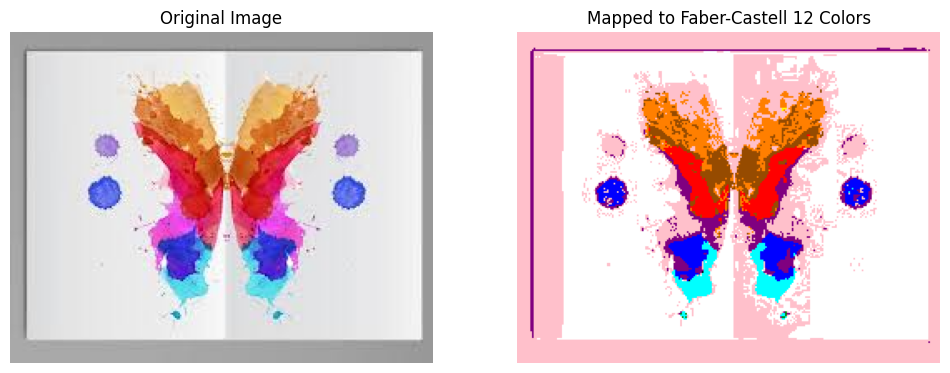

In [6]:
!pip install pillow numpy matplotlib

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

faber_castell_colors = {
    "White" : (255, 255, 255),
    "Black" : (0, 0, 0),
    "Brown" : (150, 75, 0),
    "Orange" : (255,127, 0),
    "Red" : (255, 0, 0),
    "Yellow" : (255, 255, 0),
    "Light Green" : (0, 255, 0),
    "Green" : (0, 128, 0),
    "Light Blue" : (0, 255, 255),
    "Blue" : (0, 0, 255),
    "Purple" : (128, 0, 128),
    "Pink" : (255, 192, 203)
}

def find_nearest_color(pixel, color_set):
    min_dist = float('inf')
    nearest_rgb = (0, 0, 0)
    for rgb in color_set.values():
        dist = np.linalg.norm(np.array(pixel) - np.array(rgb))
        if dist < min_dist:
            min_dist = dist
            nearest_rgb = rgb
    return nearest_rgb

uploaded = files.upload()
image_path = list(uploaded.keys()) [0]

image = Image.open(image_path).convert("RGB")
image_np = np.array(image)

output_np = np.zeros_like(image_np)

for i in range(image_np.shape[0]):
    for j in range(image_np.shape[1]):
        output_np[i, j] = find_nearest_color(image_np[i, j], faber_castell_colors)

output_image = Image.fromarray(output_np)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(image)
axs[0].set_title("Original Image")
axs[0].axis("off")
axs[1].imshow(output_image)
axs[1].set_title("Mapped to Faber-Castell 12 Colors")
axs[1].axis("off")
plt.show()

In [7]:
!pip install pillow numpy matplotlib scikit-image

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from google.colab import files

faber_castell_colors = {
    "White" : (255, 255, 255),
    "Black" : (0, 0, 0),
    "Brown" : (150, 75, 0),
    "Orange" : (255,127, 0),
    "Red" : (255, 0, 0),
    "Yellow" : (255, 255, 0),
    "Light Green" : (0, 255, 0),
    "Green" : (0, 128, 0),
    "Light Blue" : (0, 255, 255),
    "Blue" : (0, 0, 255),
    "Purple" : (128, 0, 128),
    "Pink" : (255, 192, 203)
}

faber_lab_colors = {}
for name, rgb in faber_castell_colors.items():
    rgb_norm = np.array(rgb).reshape(1, 1, 3) / 255.0
    lab = color.rgb2lab(rgb_norm)[0, 0]
    faber_lab_colors[name] = lab
